<a href="https://www.kaggle.com/code/m0hammednasser/credit-card-fraud-detection?scriptVersionId=98336597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dimensionality Reduction and Clustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV , StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix


#sampling 
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline


import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping 



# Dataset and Preprocessing

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
display(df['Class'].value_counts())
print('-'*50)
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    284315
1       492
Name: Class, dtype: int64

--------------------------------------------------
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


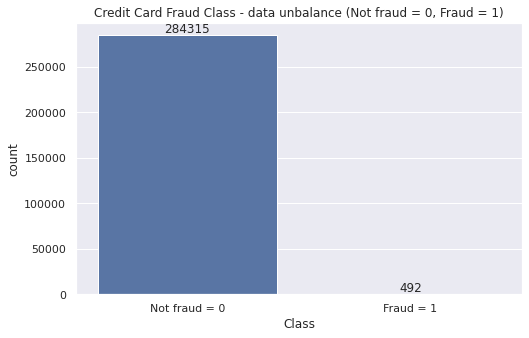

In [6]:
ax , fig = plt.subplots(figsize = [8,5])
ax = sns.countplot(data = df , x = 'Class' , )
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)');
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not fraud = 0', 'Fraud = 1']);

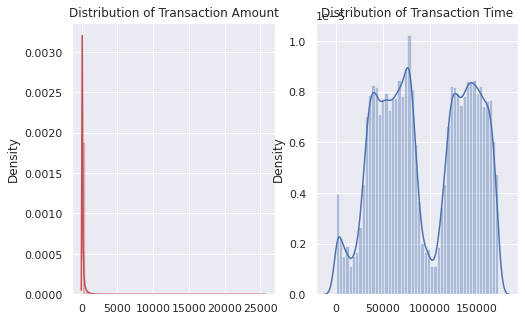

In [7]:
fig , ax = plt.subplots(1,2,figsize = [8,5])

# Amount
sns.distplot(df['Amount'].values ,  ax = ax[0] , color = 'r')
ax[0].set_title('Distribution of Transaction Amount')

# Time
sns.distplot(df['Time'].values ,  ax = ax[1] , color = 'b')
ax[1].set_title('Distribution of Transaction Time');



# Feature Scaling

In [8]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
RobScaler = RobustScaler()

scaled_amount = RobScaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = RobScaler.fit_transform(df['Time'].values.reshape(-1,1))


In [9]:
# replace the unscaled columns with its scaled values
df.drop(['Time','Amount'], axis=1, inplace=True)
df.insert(0 , 'scaled_amount' , scaled_amount)
df.insert(1 , 'scaled_time' , scaled_time)

df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Exploratory Data Analysis (EDA)

In [10]:
# under Sampling
X = df.drop('Class' , axis = 1)
y = df['Class']
RUS = RandomUnderSampler(random_state=42)
X_rus, y_rus = RUS.fit_resample(X,y) 


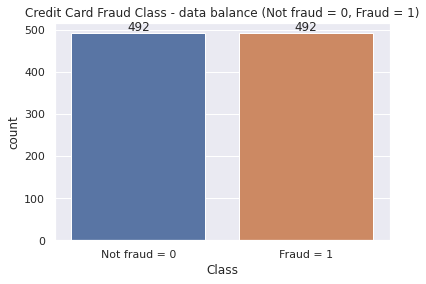

In [11]:
# show Class count again for the under sampling data
ax = sns.countplot(y_rus)
plt.title('Credit Card Fraud Class - data balance (Not fraud = 0, Fraud = 1)');
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not fraud = 0', 'Fraud = 1']);

Text(0.5, 1.0, 'balanced Correlation Matrix')

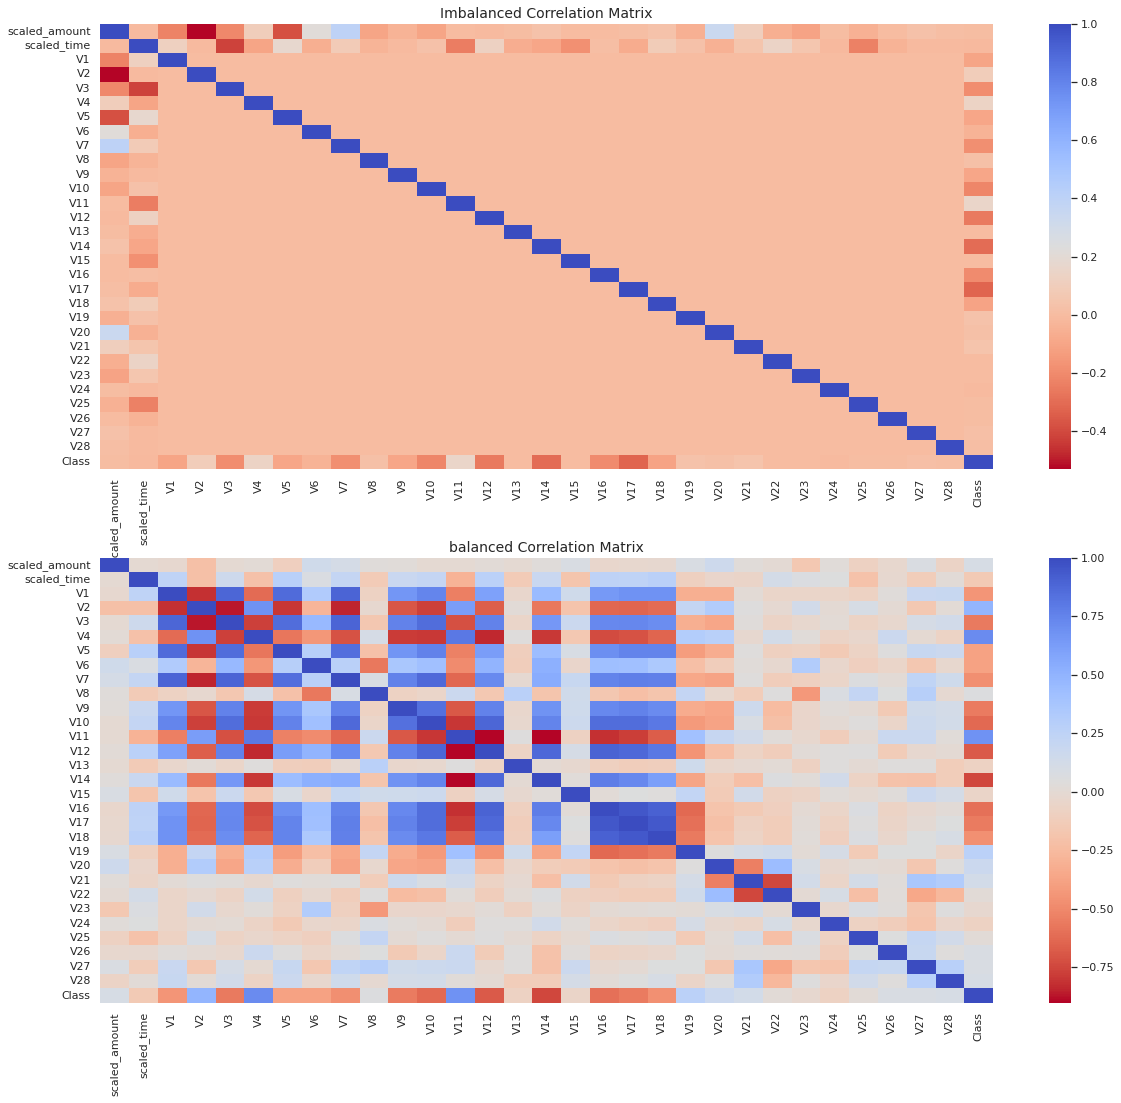

In [12]:
df_rus = pd.concat([X_rus ,y_rus]  , axis = 1)

f, ax = plt.subplots(2, 1, figsize=(20,18))

# Imbalanced Correlation Matrix for original data
sns.heatmap(df.corr() , cmap = 'coolwarm_r' , ax= ax[0] )
ax[0].set_title('Imbalanced Correlation Matrix' , fontsize=14)

# balanced Correlation Matrix for under sampling data
sns.heatmap(df_rus.corr() , cmap = 'coolwarm_r' , ax= ax[1])
ax[1].set_title('balanced Correlation Matrix' , fontsize=14)

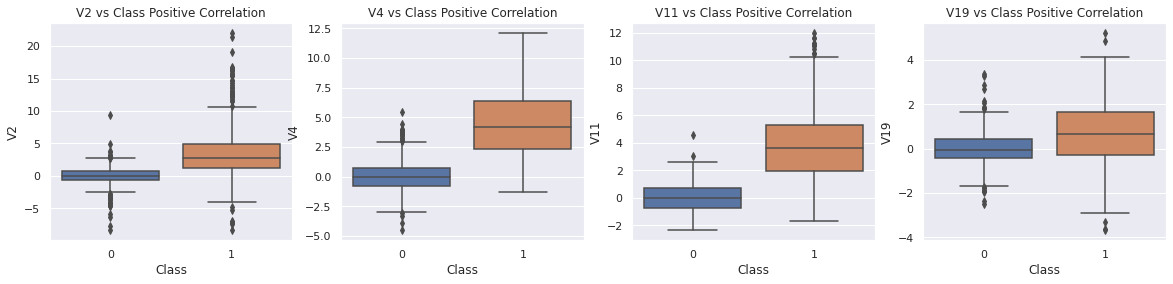

In [13]:
#Box-Plots for Positive Correlation ['V2','V4','V11','V19']

fig , ax = plt.subplots(1,4 , figsize = [20,4])

sns.boxplot(data = df_rus , x = 'Class' , y = 'V2' , ax = ax[0])
ax[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V4' , ax = ax[1])
ax[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V11' , ax = ax[2])
ax[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V19' , ax = ax[3])
ax[3].set_title('V19 vs Class Positive Correlation');

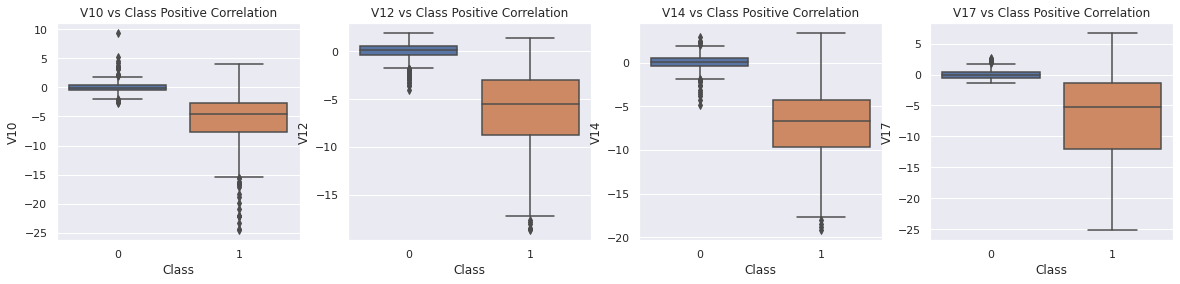

In [14]:
#Box-Plots for Negative  Correlation ['V10','V12','V14','V17']

fig , ax = plt.subplots(1,4 , figsize = [20,4])

sns.boxplot(data = df_rus , x = 'Class' , y = 'V10' , ax = ax[0])
ax[0].set_title('V10 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V12' , ax = ax[1])
ax[1].set_title('V12 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V14' , ax = ax[2])
ax[2].set_title('V14 vs Class Positive Correlation')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V17' , ax = ax[3])
ax[3].set_title('V17 vs Class Positive Correlation');

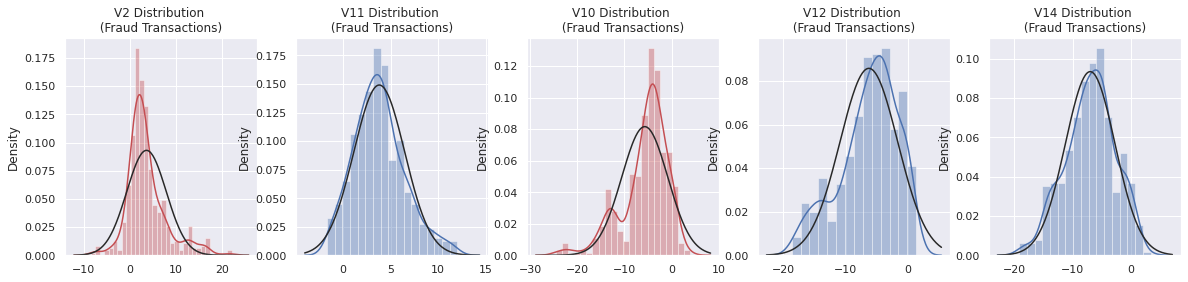

In [15]:
# Distribution of features that have noticeable outlier in (Fraud Transactions)
from scipy.stats import norm
fig , ax = plt.subplots(1,5 , figsize = [20,4])

sns.distplot( df_rus['V2'].loc[df_rus['Class']==1].values , ax = ax[0] , fit = norm , color = 'r')
ax[0].set_title('V2 Distribution \n (Fraud Transactions) ')

sns.distplot( df_rus['V11'].loc[df_rus['Class']==1].values , ax = ax[1] , fit = norm)
ax[1].set_title('V11 Distribution \n (Fraud Transactions) ')

sns.distplot( df_rus['V10'].loc[df_rus['Class']==1].values , ax = ax[2] , fit = norm , color = 'r')
ax[2].set_title('V10 Distribution \n (Fraud Transactions) ')

sns.distplot( df_rus['V12'].loc[df_rus['Class']==1].values , ax = ax[3] , fit = norm)
ax[3].set_title('V12 Distribution \n (Fraud Transactions) ')

sns.distplot( df_rus['V14'].loc[df_rus['Class']==1].values , ax = ax[4] , fit = norm)
ax[4].set_title('V14 Distribution \n (Fraud Transactions) ');


In [16]:
# Outlier Removal
def outlier_removal(df , feature , fraud):
    array = df[feature].loc[df['Class'] == fraud].values
    
    q25, q75 = np.percentile(array,25) , np.percentile(array,75)
    print(f'25th percentile: {q25:.3f} | 75th percentile: {q75:.3f}')
    iqr = q75 - q25
    print(f'Interquartile Range: {iqr:.3f}')
    
    cutoff = iqr * 1.5
    lower_threshold , upper_threshold = q25 - cutoff , q75 + cutoff
    
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    print(f'Number of outliers detected : {len(outliers)}')
    
    df = df.drop( df[(df[feature] > upper_threshold) | (df[feature] < lower_threshold)].index)
    print(f'Number of records after outlier remival: {len(df)}')
    print('-'*100)
    return df

In [17]:
# remove outliar for feature V10 , V2 since these two feature seem to have the most number of outliars 

df_rus_out = outlier_removal(df_rus ,'V2',1)
df_rus_out = outlier_removal(df_rus ,'V10',1)


25th percentile: 1.188 | 75th percentile: 4.971
Interquartile Range: 3.783
Number of outliers detected : 46
Number of records after outlier remival: 932
----------------------------------------------------------------------------------------------------
25th percentile: -7.757 | 75th percentile: -2.614
Interquartile Range: 5.143
Number of outliers detected : 19
Number of records after outlier remival: 963
----------------------------------------------------------------------------------------------------


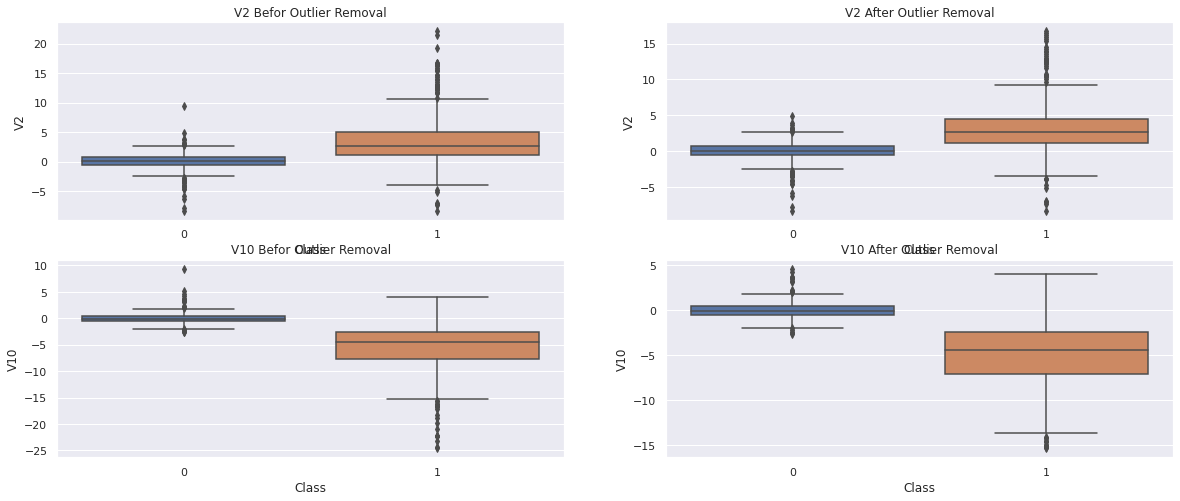

In [18]:
# see if the number of outlier is redused in ['V2','V10']
fig , ax = plt.subplots(2,2 , figsize = [20,8])

sns.boxplot(data = df_rus , x = 'Class' , y = 'V2' , ax = ax[0][0])
ax[0][0].set_title('V2 Befor Outlier Removal')

sns.boxplot(data = df_rus_out , x = 'Class' , y = 'V2' , ax = ax[0][1])
ax[0][1].set_title('V2 After Outlier Removal')

sns.boxplot(data = df_rus , x = 'Class' , y = 'V10' , ax = ax[1][0])
ax[1][0].set_title('V10 Befor Outlier Removal')

sns.boxplot(data = df_rus_out , x = 'Class' , y = 'V10' , ax = ax[1][1])
ax[1][1].set_title('V10 After Outlier Removal');

# Dimensionality Reduction and Clustering

In [19]:
import time

X = df_rus_out.drop('Class' , axis = 1)
y = df_rus_out['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components= 2 , random_state=42).fit_transform(X.values)
t1 = time.time()
print(f'T-SNE took {(t1-t0):.3f}s')

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components= 2 , random_state=42).fit_transform(X.values)
t1 = time.time()
print(f'PCA took {(t1-t0):.2f}s')

T-SNE took 5.833s
PCA took 0.06s


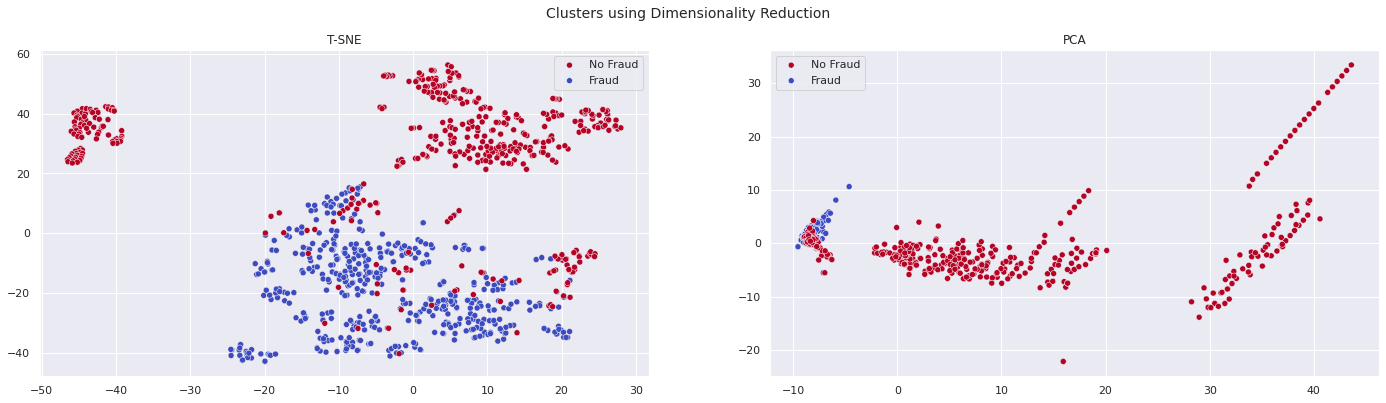

In [20]:
fig , ax = plt.subplots(1,2 , figsize = [24,6])
fig.suptitle('Clusters using Dimensionality Reduction' , fontsize=14)

sns.scatterplot(X_reduced_tsne[:,0] , X_reduced_tsne[:,1] , c =(y==0) , cmap = 'coolwarm' , ax =ax[0] , label ='No Fraud')
sns.scatterplot(X_reduced_tsne[:,0] , X_reduced_tsne[:,1] , c =(y==1) , cmap = 'coolwarm' , ax =ax[0] , label ='Fraud')
ax[0].set_title('T-SNE')

sns.scatterplot(X_reduced_pca[:,0] , X_reduced_pca[:,1] , c =(y==0) , cmap = 'coolwarm' , ax =ax[1] , label ='No Fraud')
sns.scatterplot(X_reduced_pca[:,0] , X_reduced_pca[:,1] , c =(y==1) , cmap = 'coolwarm' , ax =ax[1] , label ='Fraud')
ax[1].set_title('PCA');

it is a good sign that TSNE can cluster the Classes after the under sampling 

# Classifiers (UnderSampling)

In [21]:
# Undersampling before cross validation (prove to overfit)
X = df_rus.drop('Class', axis=1)
y = df_rus['Class']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
# the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier()
}

# Cross-Validation


In [23]:
#Calculate the cross-validation score for each classifier

print('Cross-Validation Scores')

for key ,clf in classifiers.items():
    clf.fit(X_train, y_train)
    cv_score = cross_val_score(clf , X_train, y_train , cv = 3)
    print(f'{key}: {cv_score.mean():.2f}')

Cross-Validation Scores
Logistic Regression: 0.95
Support Vector Classifier: 0.94
Decision Tree: 0.90
KNearest: 0.94


In [24]:
params = {
    'Logistic Regression':{'penalty':['l1','l2'] , 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'Support Vector Classifier': {'C': [0.5, 0.7, 0.9, 1] , 'kernel':['rbf', 'poly', 'sigmoid', 'linear']},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))},
    'KNearest': {'n_neighbors': list(range(2,5,1)) , 'algorithm' : ['auto' , 'ball_tree' , 'kd_tree' , 'brute']}
}

In [25]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier,params):
    grid_clf = GridSearchCV(classifier,params)
    grid_clf.fit(X_train,y_train)
    best_classifier = grid_clf.best_estimator_
    return best_classifier

### Overfitting Case
because we under sampling before Cross validation and this lead to "data leakage" problem. it is a common mistake

In [26]:
#Classifiers
log_reg = gridsearch(LogisticRegression(), params['Logistic Regression'])
svc = gridsearch(SVC(), params['Support Vector Classifier'])
decision_tree = gridsearch(DecisionTreeClassifier(), params['Decision Tree'])
knearest = gridsearch(KNeighborsClassifier(), params['KNearest'])

In [27]:
GS_classifiers = {
    "Logistic Regression": log_reg,
    "Support Vector Classifier": svc,
    "Decision Tree": decision_tree,
    "KNearest": knearest
}

In [28]:
#Scores after applying Grid Search
print('Cross-Validation Scores after applying GridSearch:-')
for key, classifier in classifiers.items():
    cv_score = cross_val_score(classifier, X_train, y_train, cv=3)
    print(f'{key}: {cv_score.mean():.2f}')

Cross-Validation Scores after applying GridSearch:-
Logistic Regression: 0.95
Support Vector Classifier: 0.94
Decision Tree: 0.90
KNearest: 0.94


In [29]:
log_pred = log_reg.predict(X_test)
svc_pred = svc.predict(X_test)
tree_pred = decision_tree.predict(X_test)
knear_pred = knearest.predict(X_test)

In [30]:
labels = ['No Fraud', 'Fraud']
print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))
print('\nSupport Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))
print('\nDecision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))
print('\nKNearest Neighbours:')
print(classification_report(y_test, knear_pred, target_names=labels))


Logistic Regression:
              precision    recall  f1-score   support

    No Fraud       0.90      0.97      0.93        99
       Fraud       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


Support Vector Classifier:
              precision    recall  f1-score   support

    No Fraud       0.90      0.96      0.93        99
       Fraud       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


Decision Tree:
              precision    recall  f1-score   support

    No Fraud       0.86      0.95      0.90        99
       Fraud       0.94      0.85      0.89        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted 

### undersample during cross validating
the right way to avoid overfitting and "data leakage" problem

In [31]:
original_X = df.drop('Class',axis=1)
original_y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(original_X, original_y, test_size=0.2, random_state=42 ,stratify= original_y)

print('Label Distribution:')
print(f'Train:\n{original_ytrain.value_counts() / len(original_ytrain)}')
print(f'\ntest:\n{original_ytest.value_counts() / len(original_ytest)}') 

#Turn into arrays    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values



Label Distribution:
Train:
0    0.998271
1    0.001729
Name: Class, dtype: float64

test:
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [32]:
#Lists
undersample_accuracy_lst = []
undersample_precision_lst = []
undersample_recall_lst = []
undersample_f1_lst = []
undersample_auc_lst = []

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

X_nearmiss, y_nearmiss = NearMiss().fit_resample(original_X.values, original_y.values)
print('Near Miss Distribution: {}'.format(np.unique(y_nearmiss, return_counts=True)))


# Cross Validating the right way
for train_index, test_index in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # NearMiss (undersampleing) happens during Cross Validation not before..
    undersample_model = pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    prediction = undersample_model.predict(original_Xtrain[test_index])
    
    undersample_accuracy_lst.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    undersample_precision_lst.append(precision_score(original_ytrain[test_index], prediction))
    undersample_recall_lst.append(recall_score(original_ytrain[test_index], prediction))
    undersample_f1_lst.append(f1_score(original_ytrain[test_index], prediction))
    undersample_auc_lst.append(roc_auc_score(original_ytrain[test_index], prediction))
    
print('accuracy: {}'.format(np.mean(undersample_accuracy_lst)))
print('precision: {}'.format(np.mean(undersample_precision_lst)))
print('recall: {}'.format(np.mean(undersample_recall_lst)))
print('f1_score: {}'.format(np.mean(undersample_f1_lst)))

Near Miss Distribution: (array([0, 1]), array([492, 492]))
accuracy: 0.7892646316574865
precision: 0.008558840323539567
recall: 0.923693605972087
f1_score: 0.016935171989170654


In [33]:
labels = ['No Fraud', 'Fraud']
undersample_prediction = undersample_model.predict(original_Xtest)
print(classification_report(original_ytest, undersample_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.79      0.88     56864
       Fraud       0.01      0.94      0.02        98

    accuracy                           0.79     56962
   macro avg       0.50      0.86      0.45     56962
weighted avg       1.00      0.79      0.88     56962



### Oversampling (SMOTE Technique)¶ 

In [34]:
oversample_accuracy_lst= []
oversample_precision_lst= []
oversample_recall_lst= []
oversample_f1_lst= []

X_smote, y_smote = SMOTE(sampling_strategy= 'minority').fit_resample(original_X.values, original_y.values)
print('SMOTE Distribution: {}'.format(np.unique(y_smote, return_counts=True)))


# Cross Validating the right way
for train_index , test_index in sss.split(original_Xtrain , original_ytrain):
    pipeline1 = imbalanced_make_pipeline(SMOTE(sampling_strategy= 'minority') , log_reg) # SMOTE (oversampling) happens during Cross Validation not before..
    oversample_model = pipeline1.fit(original_Xtrain[train_index] , original_ytrain[train_index] )
    prediction = oversample_model.predict(original_Xtrain[test_index])

    oversample_accuracy_lst.append(pipeline.score(original_Xtrain[test_index] , original_ytrain[test_index]))
    oversample_precision_lst.append(precision_score(original_ytrain[test_index] , prediction))
    oversample_recall_lst.append(recall_score(original_ytrain[test_index] , prediction))
    oversample_f1_lst.append(f1_score(original_ytrain[test_index] , prediction))

    
    
print(f'accuracy: {np.mean(oversample_accuracy_lst)}')
print(f'precision: {np.mean(oversample_precision_lst)}')
print(f'recall: {np.mean(oversample_recall_lst)}')
print(f'f1_score: {np.mean(oversample_f1_lst)}')

SMOTE Distribution: (array([0, 1]), array([284315, 284315]))
accuracy: 0.9745660427044702
precision: 0.059291950415973696
recall: 0.9186952288218111
f1_score: 0.11137086571743846


In [35]:
labels = ['No Fraud', 'Fraud']
oversample_prediction = oversample_model.predict(original_Xtest)
print(classification_report(original_ytest, oversample_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [36]:
undersample_prediction = undersample_model.predict(X_nearmiss)
undersample_score = accuracy_score(y_nearmiss, undersample_prediction)
smote_prediction = oversample_model.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, smote_prediction)

data = {'Technique': ['Undersampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=data)
final_df.sort_values(by='Score' , ascending = False)

,Technique,Score
1,Oversampling (SMOTE),0.975440
0,Undersampling,0.753049


# Neural Network testing Random undersampled data vs Oversampled data(SMOTe)


### Testing on Random undersampled data
 

In [37]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


2022-06-14 11:36:59.866410: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [38]:
undersample_model.compile(Adam(lr=0.001) , loss='sparse_categorical_crossentropy' , metrics =['accuracy'])


In [39]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

2022-06-14 11:37:00.195441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
26/26 - 1s - loss: 0.4263 - accuracy: 0.8013 - val_loss: 0.3598 - val_accuracy: 0.8924
Epoch 2/20
26/26 - 0s - loss: 0.2890 - accuracy: 0.8935 - val_loss: 0.2742 - val_accuracy: 0.9304
Epoch 3/20
26/26 - 0s - loss: 0.2314 - accuracy: 0.9189 - val_loss: 0.2221 - val_accuracy: 0.9494
Epoch 4/20
26/26 - 0s - loss: 0.1915 - accuracy: 0.9300 - val_loss: 0.1902 - val_accuracy: 0.9557
Epoch 5/20
26/26 - 0s - loss: 0.1641 - accuracy: 0.9364 - val_loss: 0.1692 - val_accuracy: 0.9557
Epoch 6/20
26/26 - 0s - loss: 0.1453 - accuracy: 0.9459 - val_loss: 0.1533 - val_accuracy: 0.9557
Epoch 7/20
26/26 - 0s - loss: 0.1325 - accuracy: 0.9507 - val_loss: 0.1471 - val_accuracy: 0.9557
Epoch 8/20
26/26 - 0s - loss: 0.1229 - accuracy: 0.9539 - val_loss: 0.1431 - val_accuracy: 0.9684
Epoch 9/20
26/26 - 0s - loss: 0.1143 - accuracy: 0.9587 - val_loss: 0.1378 - val_accuracy: 0.9620
Epoch 10/20
26/26 - 0s - loss: 0.1079 - accuracy: 0.9587 - val_loss: 0.1353 - val_accuracy: 0.9620
Epoch 11/20
26/26 -

In [40]:
undersample_predictions = undersample_model.predict(X_test, batch_size=200, verbose=0)
undersample_fraud_predictions =np.argmax(undersample_predictions,axis=1)


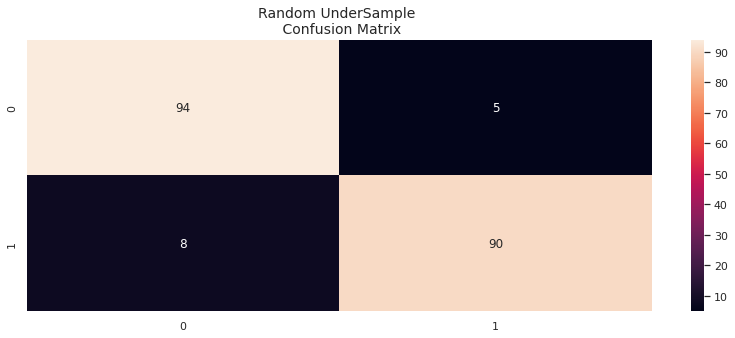

In [41]:
undersample_cm = confusion_matrix(y_test, undersample_fraud_predictions)

ax  = plt.figure(figsize=(14,5))
ax = sns.heatmap(undersample_cm, annot=True)
ax.set_title("Random UnderSample \n Confusion Matrix", fontsize=14);

### Testing on Oversampled data(SMOTE Technique)¶


In [42]:
n_inputs = original_Xtrain.shape[1]

oversample_model = Sequential([
    Dense(n_inputs , input_shape = (n_inputs,) , activation = 'relu'),
    Dense(32 , activation = 'relu'),
    Dense(2 , activation = 'softmax')
    
])
oversample_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [43]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
oversample_model.fit(original_Xtrain, original_ytrain, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)


Epoch 1/20
608/608 - 3s - loss: 0.0279 - accuracy: 0.9959 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/20
608/608 - 2s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 3/20
608/608 - 2s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/20
608/608 - 3s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 5/20
608/608 - 2s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 6/20
608/608 - 2s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 7/20
608/608 - 2s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 8/20
608/608 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 9/20
608/608 - 2s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 10/20
608/608 - 2s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995

In [44]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions =np.argmax(oversample_predictions,axis=1)


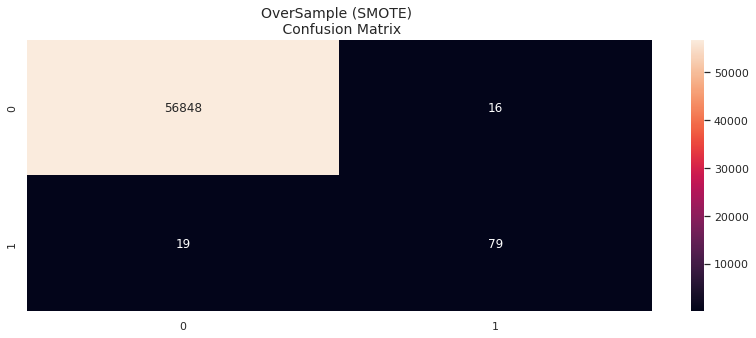

In [45]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)

ax  = plt.figure(figsize=(14,5))
ax = sns.heatmap(oversample_smote, annot=True , fmt='d')
ax.set_title("OverSample (SMOTE) \n Confusion Matrix", fontsize=14);

**Conclusion:**<br>
Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase